# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [10]:
medical.shape

(1338, 8)

In [11]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [12]:
int(np.sqrt(medical.charges.count()))

36

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

A: The mean value is 13270.422265. The descriptive standard deviation of data is 12105, while the infer standard deviation is 12110 by normalizing with n-1.

In [13]:
sampleCount = medical.charges.count()

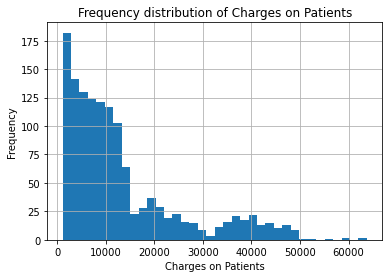

In [14]:
medical.charges.hist(bins= int(np.sqrt(sampleCount)))
plt.xlabel('Charges on Patients')
plt.ylabel('Frequency')
plt.title('Frequency distribution of Charges on Patients')
plt.show()

In [15]:
medical.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [16]:
sampleMean = np.mean(medical.charges)
np.std(medical.charges),np.std(medical.charges, ddof=1), np.mean(medical.charges)

(12105.484975561605, 12110.011236693994, 13270.422265141257)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

A: The null hypothesis would be that the average charge has fallen below 12,000 until we have evidence against it, in which case we would use our sample mean (13,270) as our best estimator for the porpulation mean to see if it is statistically significant enough to reject the null hypothesis.   

Given that, we only have one random sample with size 1338, and the underlying distribution is not normal, we could check the p-value of our estimator to see if it's statistically significant enough.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

##### A:In this case, given the nature of the administrator's concern, the appropriate confidence interval would be 95%. 
Since the sample mean is already greater than the null hypothesis $12,000, so this would be a one-sided interval. 

The administrator should not be concerned our null hypothesis, since with 95% confidence that the actual average charges would lie above the lower limit 12,620 (t-value) or 12,621 (z-value).  Since it's one-sided interval, we could say that even with 97.5% probability that the true population mean would fall 

In [17]:
# Calculate the critial value using z-score and t-score, I guess the sample size 1337 is large so the t-score is close to z score
alpha =(1-0.95)/2
df=1338-1
criticalV_t = 1.96174  
criticalV_z = 1.96
stats.norm.ppf(.975), stats.t.ppf(alpha,df)

(1.959963984540054, -1.961739888600845)

In [25]:
sampleStd= np.std(medical.charges, ddof=1)
standardE = sampleStd/np.sqrt(sampleCount)

In [26]:
# Calculate the margin of error
marginE_t = criticalV_t * standardE
marginE_z = criticalV_z * standardE
print(marginE_t, marginE_z)

649.4682678292465 648.8922104587372


In [27]:
l_z = sampleMean - marginE_z
l_t = sampleMean - marginE_t
print(l_t, l_z)

12620.95399731201 12621.53005468252


In [31]:
# further practices with function 
stats.t.ppf(0.025,df,sampleMean,standardE), stats.norm.ppf(.025, sampleMean,standardE)

(12620.954034192644, 12621.54197822916)

In [38]:
stats.t.ppf(0.00025,df,sampleMean,standardE), stats.norm.ppf(.00025, sampleMean,standardE)
# accutally with 99.975% confidence to reject the hypothesis

(12115.224732487655, 12118.057103261348)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

A:The null hypothesis is that people with insurance are charged same as those without. The alternative hypothesis is that people with insuance are charged different than those without.   
The asumption about the variances of the two groups are that both group are proportionally representative, providing enough samples to reflect the variablity. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

A:The test statistic for the charge difference between those with and without insurance is -12, which reflects a rather significant difference with p-value of 31 0s. So we can reject the null hypothesie and accept the alternative hypothesis.????  

In [43]:
# Calculate the means and counts for two groups
mean_f = medical.groupby('insuranceclaim').charges.mean()[0]
mean_t = medical.groupby('insuranceclaim').charges.mean()[1]
print(mean_f, mean_t)
count_f = medical.groupby('insuranceclaim').charges.count()[0]
count_t = medical.groupby('insuranceclaim').charges.count()[1]
print(count_f, count_t)
std_f = medical.groupby('insuranceclaim').charges.std()[0]
std_t = medical.groupby('insuranceclaim').charges.std()[1]
print(std_f, std_t)

8821.421892306294 16423.928276537663
555 783
6446.510126811733 14045.928418802128


In [65]:
var_f = medical.groupby('insuranceclaim').charges.var()[0]
var_t = medical.groupby('insuranceclaim').charges.var()[1]
print(var_f, var_t)

41557492.81508622 197288105.14611325


In [82]:
# Calculate the Standard Error with pool std based on given formula
std_p= np.sqrt((((count_f-1)*var_f) + ((count_t -1)*var_t))/(count_t+count_f-2))
sError = std_p * np.sqrt(1/count_f + 1/count_t)
# Based on different formaula sqrt [var1/n1 + var2/n2]
sError_a = np.sqrt( var_f/count_f + var_t/count_t)
print(std_p, sError, sError_a)

11520.034268775256 639.2260351391293 571.701617822604


In [81]:
# Calculate the t-statistic by the ratio of the estimate to it's standard error based on given formula
estimate = (mean_f -mean_t)
t_statistics = estimate / sError
t_statistics_a = estimate / sError_a
print(t_statistics, t_statistics_a)

-11.89329903087671 -13.298031957975647


In [51]:
# Using the stats method
data_f = medical.loc[medical['insuranceclaim']==False,'charges']
data_t = medical.loc[medical['insuranceclaim']==True,'charges']

In [60]:
stats.ttest_ind(data_f,data_t, equal_var=False) #????

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

In [71]:
stats.ttest_ind_from_stats(mean1=mean_f,std1=std_f,nobs1=count_f, mean2=mean_t,std2=std_t,nobs2=count_t)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

A: One major requirment is the data is normal distributed, which is not our case here, while t-test doesn't.  And it seems that t-test are specially good for two sample comparision. 


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test